# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Predicting salaries(target variable) on basis of features(independent variables)

In [1]:
import os
os.getcwd()

'C:\\Users\\ManishaSpatialInsigh'

In [2]:
os.chdir('D:\\testproject')
os.getcwd()

'D:\\testproject'

In [3]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#your info here
__author__ = "manisha"
__email__ = "singhmanisha2525@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
# load the train and test data
df_train_salaries = pd.read_csv('D:\\testproject\\data\\train_salaries.csv')
df_train_features = pd.read_csv('D:\\testproject\\data\\train_features.csv')
df_test_features = pd.read_csv('D:\\testproject\\data\\test_features.csv')

In [5]:
df_train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
df_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [7]:


df_test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
df_train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
df_train_salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [10]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
df_train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [12]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [13]:
df_test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


### ---- 3 Clean the data ----

In [14]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df_train_salaries.duplicated().sum()


0

In [15]:
df_train_features.duplicated().sum()

0

In [16]:
df_test_features.duplicated().sum()

0

### ---- 4 Explore the data (EDA) ----

In [17]:
df_train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [18]:
# numerical and categorical variables in a list for later 
num_col = ['yearsExperience','milesFromMetropolis']


In [19]:
cat_col = ['jobId','companyId', 'jobType','degree', 'major','industry']

In [20]:
#summarize each feature variable
df_train_features.describe(include = [np.number])
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [21]:
df_train_features.describe(include= ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685357984,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [22]:
#merge train and target data
train_df = pd.merge(df_train_features, df_train_salaries, on='jobId')

In [23]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [24]:
# groupby jobtype, degree
train_test = train_df[['jobType', 'industry',  'salary']]

In [25]:
train_test_grp = train_test.groupby(['jobType','industry'], as_index=False).mean()
train_test_grp

,jobType,industry,salary
0,CEO,AUTO,139.126480
1,CEO,EDUCATION,128.306144
2,CEO,FINANCE,159.916932
3,CEO,HEALTH,145.115908
4,CEO,OIL,160.464799
5,CEO,SERVICE,133.350280
6,CEO,WEB,150.710337
7,CFO,AUTO,128.866016
8,CFO,EDUCATION,118.775361
9,CFO,FINANCE,149.955314


In [26]:
#transform above data into pivot table
df_pivot =train_test_grp.pivot(index='industry', columns='jobType')
df_pivot

salary                                                 \
jobType           CEO         CFO         CTO    JANITOR      JUNIOR   
industry                                                               
AUTO       139.126480  128.866016  128.752108  64.741013   88.666143   
EDUCATION  128.306144  118.775361  118.703032  55.204577   78.878164   
FINANCE    159.916932  149.955314  150.041805  85.120400  110.226984   
HEALTH     145.115908  134.687750  135.680892  70.309998   95.122034   
OIL        160.464799  150.337443  150.113902  85.307827  110.148605   
SERVICE    133.350280  124.122543  123.428858  60.205064   83.558421   
WEB        150.710337  141.181463  141.603892  75.038813  101.136843   

                                                  
jobType       MANAGER      SENIOR VICE_PRESIDENT  
industry                                          
AUTO       108.540599   98.878101     118.674694  
EDUCATION   98.944513   88.832586     108.498984  
FINANCE    129.948605  120.429226     140.078083  
HEALTH     115.105228  105.141989     124.834675  
OIL        130.233432  119.970093     140.323687  
SERVICE    103.796372   93.949206     113.517558  
WEB        120.930051  111.170494     131.439326

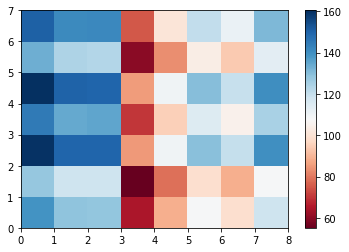

In [27]:
#generating heatmap for categorical varibale with target variabel
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

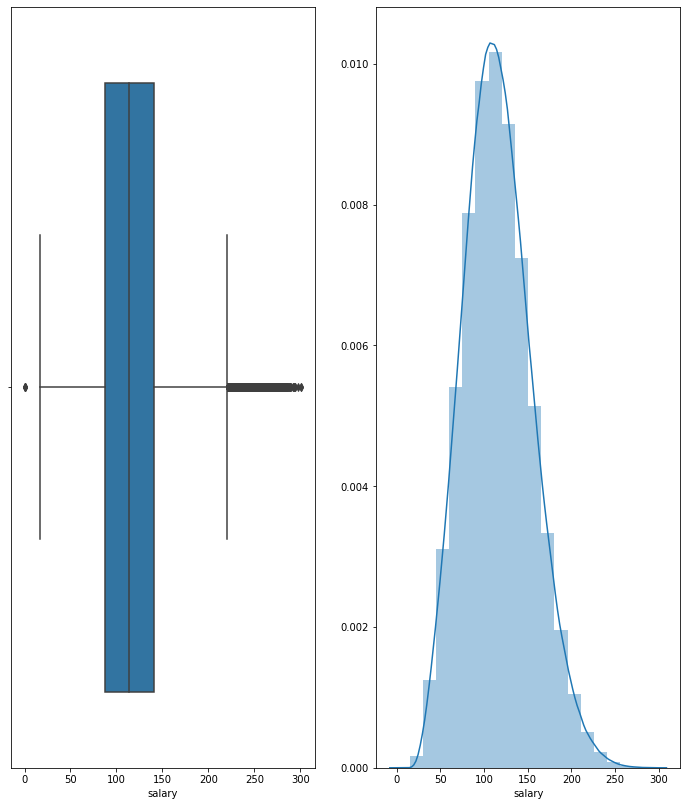

In [29]:
# visulaizing the target varibale
plt.figure(figsize = (12,14))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

In [31]:
#find outliers
stats = train_df.salary.describe()
print(stats)
IQR = stats['75%'] - stats['25%']
Upper_range = stats['75%'] + 1.5*IQR
Lower_range = stats['25%'] - 1.5*IQR
print('The upper and lower range for possible outliers are {} and {}.'.format(Upper_range,Lower_range))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower range for possible outliers are 220.5 and 8.5.


In [33]:
# check potential outliers for lower_range 
train_df[train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [35]:
# check upper_range potential outliers
train_df.loc[train_df.salary>220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [38]:
train_df[(train_df.salary>220.5) & (train_df.jobType == 'JUNIOR') ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


high paying industry ie oil and finance and degree explains these outliers so will keep it as it is.

In [39]:
# lower_range are indication of missing values, we can remove them from training data
train_df = train_df[train_df.salary > 8.5]

In [42]:
# visulaization of  various columns with target variable
def plot_viz(df,col):
    plt.figure(figsize=(12,14))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['salary'].mean()
        df[col]=df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace =True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1 ,2, 2)
    
    if df[col].dtype == 'int64' or col == 'CompanyId':
        mean =df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values + std.values, 
                         alpha = 0.1)
    else:
        sns.boxplot(x=col, y = 'salary', data =df)
        
    plt.xticks(rotation =45)
    plt.ylabel('Salaries')
    plt.show()
        


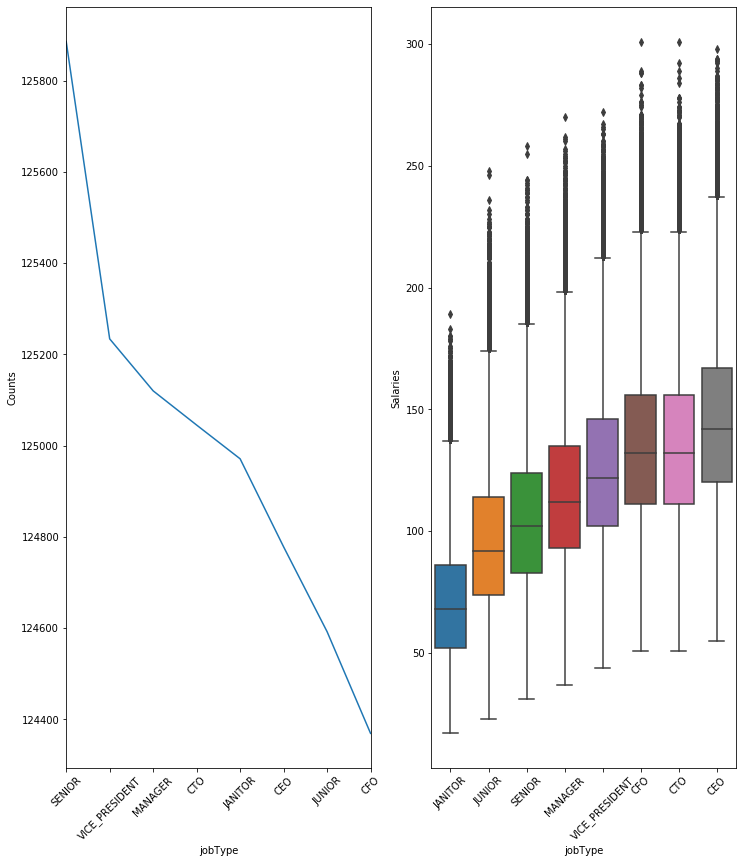

In [43]:
plot_viz(train_df, 'jobType')

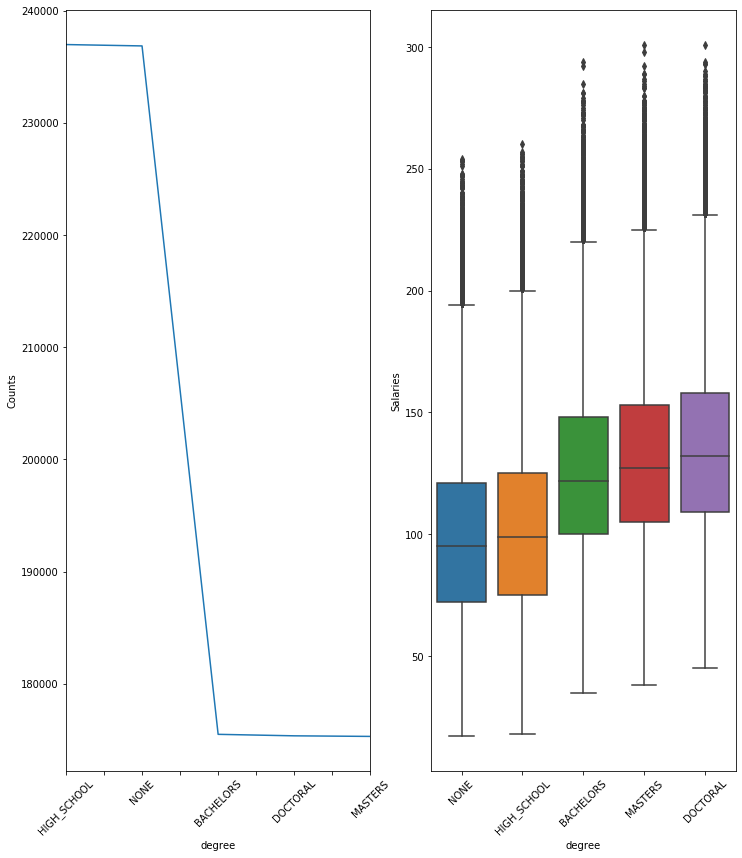

In [44]:
plot_viz(train_df, 'degree')

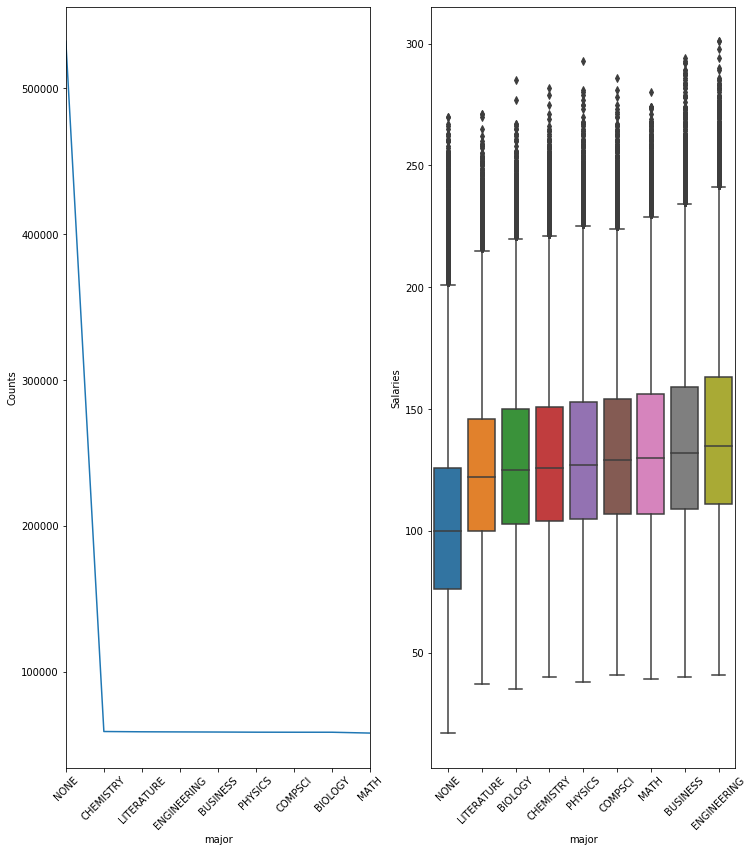

In [45]:
plot_viz(train_df, 'major')

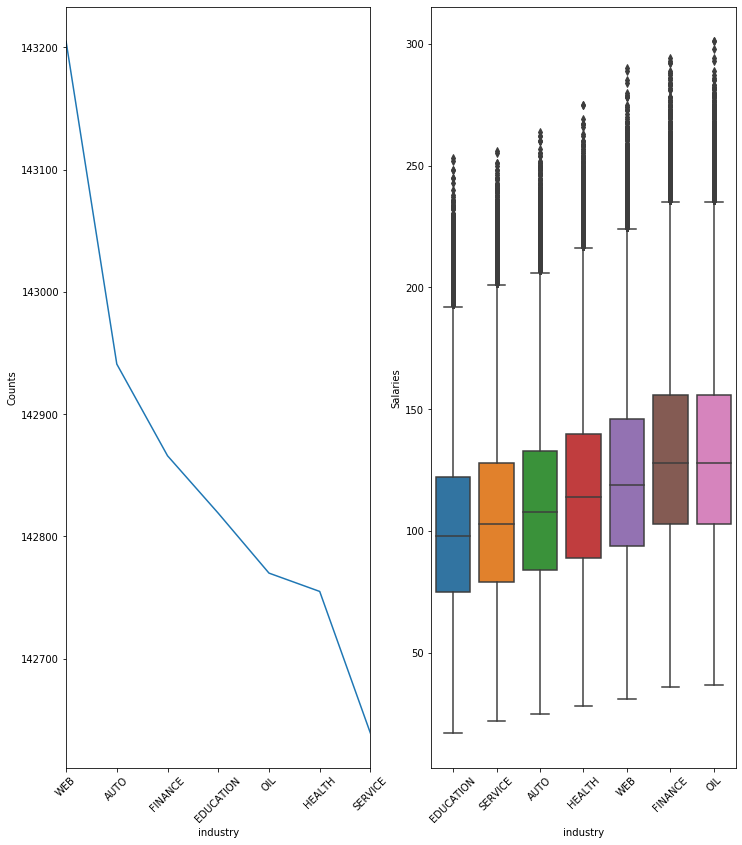

In [46]:
plot_viz(train_df, 'industry')

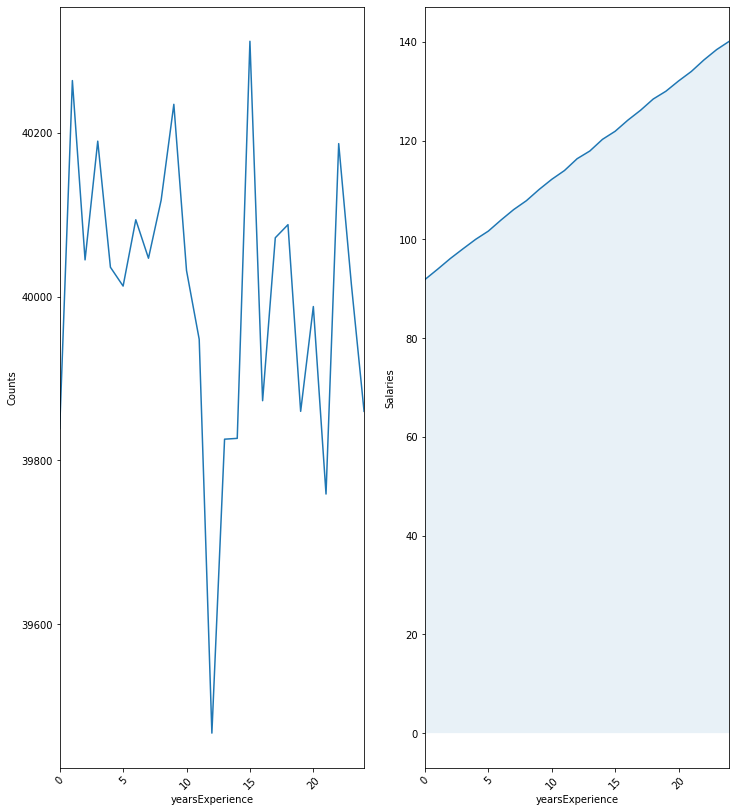

In [49]:
plot_viz(train_df, 'yearsExperience')

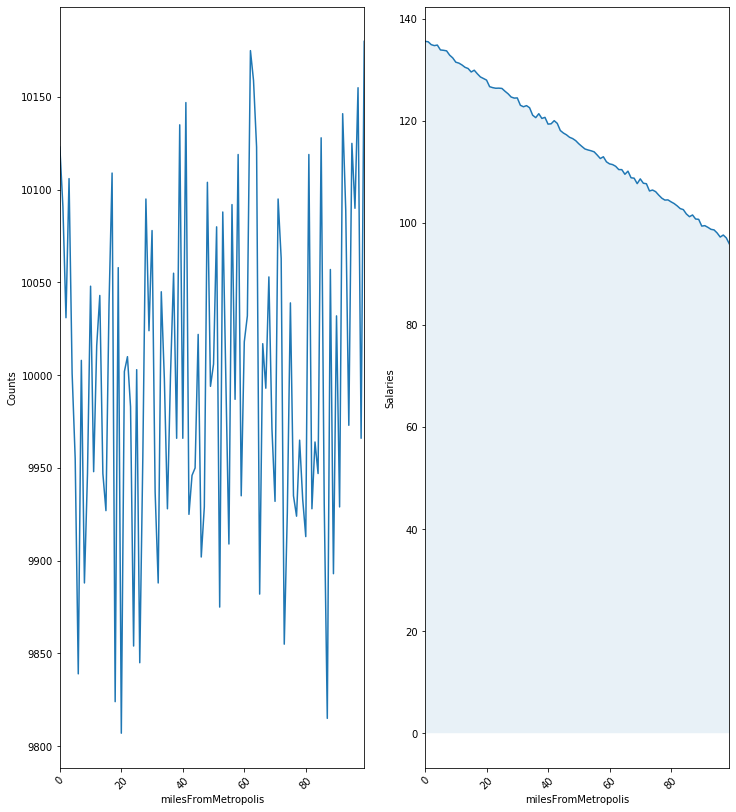

In [50]:
plot_viz(train_df, 'milesFromMetropolis')

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data